# 1. Begin (or restart) part "3(a)" of the TUT Demo and interact with a ChatBot to make sure you understand how each part the Monte Hall problem code above works

In [1]:
import numpy as np

numpy is imported to handle random choices and operations efficiently. Specifically, np.random.choice is used to simulate random door selection.

In [2]:
all_door_options = (1, 2, 3)  # tuple of door options
my_door_choice = 1  # default initial door choice
i_won = 0  # counter for the number of times the contestant wins by switching
reps = 100000  # number of repetitions for simulation

all_door_options: A tuple representing the three doors (1, 2, and 3). Behind one of these doors is the car, and behind the others are goats.
my_door_choice: This variable is initialized to 1, representing the door the contestant initially picks.
i_won: A counter that tracks how many times the contestant wins by switching. This is initialized to zero and incremented each time the contestant wins.
reps: The number of repetitions of the simulation (100,000 times). The more repetitions, the closer the result will get to the theoretical probabilities.

In [6]:
for i in range(reps):
        secret_winning_door = np.random.choice(all_door_options)
        all_door_options_list = list(all_door_options)

A for loop runs the simulation reps times (100,000 in this case). Each iteration represents one complete game of the Monty Hall problem.

secret_winning_door: Randomly selects one of the three doors (1, 2, or 3) as the door that hides the car. This simulates Monty randomly placing the car behind one of the doors.
all_door_options_list: Converts the tuple of door options into a list so that doors can be easily removed as the game progresses.

In [7]:
    all_door_options_list.remove(secret_winning_door)

The door hiding the car (secret_winning_door) is removed from all_door_options_list to ensure Monty never reveals the car when opening a goat door.

In [8]:
    try:
        all_door_options_list.remove(my_door_choice)
    except ValueError:
        pass

Purpose: After removing the door with the car, Monty tries to remove the contestant's initial door choice from the list. If the contestant's door is the same as the winning door (car), it has already been removed, which triggers a ValueError. The try-except block ensures the simulation continues without error when this happens.

In [9]:
    goat_door_reveal = np.random.choice(all_door_options_list)
    all_door_options_list.remove(goat_door_reveal)

goat_door_reveal: Monty reveals one of the remaining doors, which is guaranteed to be a goat. This door is randomly selected from the remaining options.
After revealing a goat door, Monty removes it from the list (all_door_options_list.remove(goat_door_reveal)), leaving one door in the list.

In [10]:
    if secret_winning_door != my_door_choice:
        all_door_options_list.append(secret_winning_door)

If the contestant’s initial door (my_door_choice) was not the winning door (car), the car door is added back to the list. This is important because we previously removed it in step 5.
After Monty has revealed a goat, the list contains only two doors: the original choice (which may be a goat) and the other door (which could be the car or another goat).

In [11]:
    my_door_choice = all_door_options_list[0]

The contestant swaps to the remaining door after Monty's reveal. Since only one door remains, this door is chosen by the contestant.


In [12]:
    if my_door_choice == secret_winning_door:
        i_won += 1

This checks whether the contestant's new choice (after switching) is the door hiding the car. If the contestant chose the winning door, the i_won counter is incremented by 1.

In [13]:
i_won / reps

1e-05

After running the loop for all repetitions (reps), the simulation calculates the proportion of wins by dividing i_won (the number of wins) by reps (the total number of games played).
This value represents the probability of winning by switching.

Here is the full version

In [15]:
import numpy as np
all_door_options = (1,2,3)  # tuple
my_door_choice = 1  # 1,2,3
i_won = 0
reps = 100000
for i in range(reps):
    secret_winning_door = np.random.choice(all_door_options)
    all_door_options_list = list(all_door_options)
    # take the secret_winning_door, so we don't show it as a "goat" losing door
    all_door_options_list.remove(secret_winning_door)
    try:
        # if my_door_choice was secret_winning_door then it's already removed
        all_door_options_list.remove(my_door_choice)
    except:
        pass
    # show a "goat" losing door and remove it
    goat_door_reveal = np.random.choice(all_door_options_list)
    all_door_options_list.remove(goat_door_reveal)

    # put the secret_winning_door back in if it wasn't our choice
    # we previously removed it, so it would be shown as a  "goat" losing door
    if secret_winning_door != my_door_choice:
        all_door_options_list.append(secret_winning_door)
    # if secret_winning_door was our choice then all that's left in the list is a "goat" losing door
    # if secret_winning_door wasn't our choice then it's all that will be left in the list

    # swap strategy
    my_door_choice = all_door_options_list[0]

    if my_door_choice == secret_winning_door:
        i_won += 1

i_won/reps

0.66431

# 2. Extend your ChatBot sessions to now address part "3(b)" of the TUT Demo and interact with your ChatBot to see if it can suggest a simpler, more streamlined way to code up this for loop simulation so the process is more clear and easier to understand; then, describe any preferences you have in terms of readibility or explainability between the original code and the code improvements suggested by the ChatBot

### Here's a more streamlined and simplified version of the Monty Hall simulation code which is provided by Chat GPT

In [17]:
import numpy as np

# Variables
reps = 100000  # number of repetitions for the simulation
wins = 0  # counter for the number of wins when switching

# Simulation loop
for i in range(reps):
    # Step 1: Randomly place the car behind one of the doors (1, 2, or 3)
    car_door = np.random.choice([1, 2, 3])
    
    # Step 2: Contestant randomly picks a door
    contestant_choice = np.random.choice([1, 2, 3])
    
    # Step 3: Host opens a door with a goat (not the car or contestant's choice)
    available_doors = [door for door in [1, 2, 3] if door != contestant_choice and door != car_door]
    host_opens = np.random.choice(available_doors)
    
    # Step 4: Contestant switches to the remaining door
    remaining_door = [door for door in [1, 2, 3] if door != contestant_choice and door != host_opens][0]
    
    # Step 5: Check if the contestant wins by switching
    if remaining_door == car_door:
        wins += 1

# Output the win percentage when switching
print(f"Win percentage when switching: {wins / reps * 100:.2f}%")

Win percentage when switching: 66.55%


### Describe my preferences

Based on readibility and explainability,I think the code provided by Chatbot is more concise and easier to understand.

# 3. Submit your preferred version of the Monty Hall problem that is verified to be running and working with a final printed output of the code; then, add code comments explaining the purpose of each line of the code

In [16]:
import numpy as np

# Variables
reps = 100000  # number of repetitions for the simulation
wins = 0  # counter for the number of wins when switching

# Simulation loop
for i in range(reps):
    # Step 1: Randomly place the car behind one of the doors (1, 2, or 3)
    car_door = np.random.choice([1, 2, 3])
    
    # Step 2: Contestant randomly picks a door
    contestant_choice = np.random.choice([1, 2, 3])
    
    # Step 3: Host opens a door with a goat (not the car or contestant's choice)
    available_doors = [door for door in [1, 2, 3] if door != contestant_choice and door != car_door]
    host_opens = np.random.choice(available_doors)
    
    # Step 4: Contestant switches to the remaining door
    remaining_door = [door for door in [1, 2, 3] if door != contestant_choice and door != host_opens][0]
    
    # Step 5: Check if the contestant wins by switching
    if remaining_door == car_door:
        wins += 1

# Output the win percentage when switching
print(f"Win percentage when switching: {wins / reps * 100:.2f}%")

Win percentage when switching: 66.41%


# Summary

### Monty Hall Problem Code:

You initially asked for a Python code to simulate the Monty Hall problem, which I provided. The code simulated the Monty Hall problem where a contestant could either switch or stay with their choice to determine win percentages.

### Reviewing a Complex Code:

You then shared a Monty Hall simulation code that involved more detailed list manipulations and asked if I could provide a similar code but in a more streamlined form. I broke down the provided code for clarity and explained how it functioned step by step.

### Simplifying the Code:

I provided a more streamlined version of the Monty Hall simulation, removing redundant steps, simplifying the logic (using list comprehensions), and focusing on core operations to make the code easier to understand.

### Comparison Between Old and New Code:

You asked for a comparison between the original, more complex code and the streamlined version. I explained the differences in structure, door removal, switching logic, and how the new version was shorter, more readable, and efficient without affecting the outcome.

The link of the conversation
https://chatgpt.com/share/66ec6304-c188-8007-a629-e977c3088717 

# 4. Watch the embedded video tutorial on Markov chains in the next Jupyter cell below to understand their application and relevance for ChatBots; then, after watching the video, start a new ChatBot session by prompting that you have code that creates a "Markovian ChatBot"; show it the first version of the "Markovian ChatBot code" below; and interact with the ChatBot session to make sure you understand how the original first version of the "Markovian ChatBot code" works

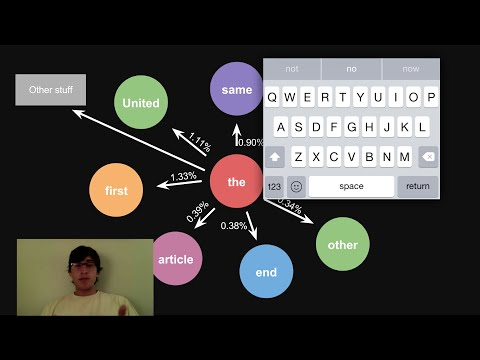

In [19]:
# Markov Chains and Text Generation
from IPython.display import YouTubeVideo
YouTubeVideo('56mGTszb_iM', width = 550)

1. Importing Libraries

In [20]:
import random
from collections import defaultdict

random: Used for selecting random words from the Markov chain.

defaultdict: A specialized dictionary that provides a default value for nonexistent keys, which simplifies the code.

2. Generating the Markov Chain

In [26]:
def generate_markov_chain(conversation_data, chain_length=1):
    words = conversation_data.split()
    markov_chain = defaultdict(list)
    for i in range(len(words) - chain_length):
        key = tuple(words[i:i + chain_length])
        next_word = words[i + chain_length]
        markov_chain[key].append(next_word)

generate_markov_chain: This function takes conversation data as input and builds a Markov chain.

conversation_data.split(): Splits the conversation text into a list of words.

defaultdict(list): Initializes a Markov chain where each key will be a tuple of words, and the value will be a list of possible following words.

for i in range(len(words) - chain_length):

    key = tuple(words[i:i + chain_length])
    
    next_word = words[i + chain_length]
    
    markov_chain[key].append(next_word)

This loop iterates over the words, creating keys based on the specified chain_length (e.g., 2 words).

For each key, it appends the next word in the sequence to the list of possible continuations.

3. Generating Responses

In [27]:
def markov_chatbot_reply(markov_chain, user_input, chain_length=1, max_words=50):
    user_words = user_input.split()
    key = tuple(user_words[-chain_length:])

markov_chatbot_reply: This function generates a response based on user input and the Markov chain.
    
It extracts the last chain_length words from the user input to form the starting key.

Finding the Starting Key

In [ ]:
if key not in markov_chain:
    key = random.choice(list(markov_chain.keys()))

If the key is not found in the Markov chain, a random key is selected to start the response.

Generating the Reply

In [ ]:
response = list(key)
for _ in range(max_words - chain_length):
    next_words = markov_chain.get(key)
    if not next_words:
        break
    next_word = random.choice(next_words)
    response.append(next_word)
    key = tuple(response[-chain_length:])

The response starts with the initial key. The loop generates additional words by randomly selecting from the list of possible next words.

The loop continues until it reaches the maximum word count or if no next words are found.

4. Training and Running the Bot

In [ ]:
conversation_data = """
Hello! How can I assist you today? ...
"""

chain_length = 2  # Number of words in a chain
markov_chain = generate_markov_chain(conversation_data, chain_length)

conversation_data: This is the training text for the chatbot.
    
The Markov chain is generated based on this data.

5. Simulating a Conversation

In [ ]:
print("Markovian ChatBot: Hello! How can I assist you today?")

while True:
    user_input = input("You: ")
    if user_input.lower() in ["exit", "quit", "bye"]:
        print("Markovian ChatBot: Goodbye!")
        break
    
    reply = markov_chatbot_reply(markov_chain, user_input, chain_length)
    print("Markovian ChatBot:", reply)

The bot starts with a greeting and enters a loop to receive user input.

If the user types an exit command, the bot says goodbye and ends the conversation.

Otherwise, it generates a reply using the Markov chain and prints it.

Here is the whole version

In [ ]:
import random
from collections import defaultdict

# Step 1: Generate Markov Chain from the conversation data
def generate_markov_chain(conversation_data, chain_length=1):
    words = conversation_data.split()
    markov_chain = defaultdict(list)

    # Create the Markov chain by building a dictionary where each key is a tuple of 'chain_length' words,
    # and the value is a list of possible next words.
    for i in range(len(words) - chain_length):
        key = tuple(words[i:i + chain_length])
        next_word = words[i + chain_length]
        markov_chain[key].append(next_word)

    return markov_chain

# Step 2: ChatBot responds using the Markov Chain
def markov_chatbot_reply(markov_chain, user_input, chain_length=1, max_words=50):
    user_words = user_input.split()
    # Try to find a starting key in the Markov chain based on the user input
    key = tuple(user_words[-chain_length:])
    
    # If the key isn't found, select a random starting point
    if key not in markov_chain:
        key = random.choice(list(markov_chain.keys()))

    response = list(key)

    # Generate the reply by predicting the next word
    for _ in range(max_words - chain_length):
        next_words = markov_chain.get(key)
        if not next_words:
            break
        next_word = random.choice(next_words)
        response.append(next_word)
        key = tuple(response[-chain_length:])
    
    return ' '.join(response)

# Example conversation data for the ChatBot to learn from
conversation_data = """
Hello! How can I assist you today? I'm here to help with any questions you have.
Feel free to ask me anything. Whether you have technical questions or just want to chat,
I'm happy to assist. How are you feeling today? What's on your mind?
"""

# Step 3: Train the ChatBot
chain_length = 2  # Number of words in a chain
markov_chain = generate_markov_chain(conversation_data, chain_length)

# Step 4: Simulate a conversation with the ChatBot
print("Markovian ChatBot: Hello! How can I assist you today?")

while True:
    user_input = input("You: ")  # User input
    if user_input.lower() in ["exit", "quit", "bye"]:
        print("Markovian ChatBot: Goodbye!")
        break
    
    reply = markov_chatbot_reply(markov_chain, user_input, chain_length)
    print("Markovian ChatBot:", reply)

Markovian ChatBot: Hello! How can I assist you today?


# Summary

Markovian ChatBot: 
You shared that you have code to create a Markovian ChatBot. We discussed the basic functionality of the code, which uses a Markov chain to generate responses based on training conversation data.

Code Breakdown: 
I provided an explanation of how the code works, detailing the steps for generating the Markov chain, responding to user input, and simulating a conversation. Key components included building the chain from conversation data, selecting random words for responses, and handling user input.

Suggestions for Improvement: 
I offered some suggestions for enhancing the chatbot, such as allowing it to learn from ongoing conversations, improving response variety, and handling punctuation more effectively.

The link of ChatBot conversation: https://chatgpt.com/share/66ec7904-e234-8007-a93b-c5fe7442ff2e

# 5. Recreate (or resume) the previous ChatBot session from question "4" above, and now prompt the ChatBot session that you have a couple extensions of the code to show it, and then show it each of the extentions of the "Markovian ChatBot code" below in turn


### 1. Without just supplying your ChatBot session with the answers, see if the ChatBot can figure out what the extensions in the code do; namely, making character specific Markov chains, and using bigrams (rather than just the previous word alone) dependency... prompt your ChatBot session with some hints if it's not seeming to "get it"

I gave ChatBot three extension codes respectively and let's see if ChatBot can give me the reasonable explanation of what the code does. 

In [ ]:
This is the frist one.

In [ ]:
def generate_text_with_start(markov_chain, start_words, chain_length=1, max_words=100):
    words = start_words.split()
    key = tuple(words[-chain_length:]) if len(words) >= chain_length else random.choice(list(markov_chain.keys()))
    output = list(key)
    
    for _ in range(max_words - chain_length):
        next_words = markov_chain.get(key)
        if not next_words:
            break
        next_word = random.choice(next_words)
        output.append(next_word)
        key = tuple(output[-chain_length:])
    
    return ' '.join(output)


start_words = "Markov chains"
generated_text = generate_text_with_start(markov_chain, start_words, chain_length, max_words=50)
print("Generated Text with Start:")
print(generated_text)

The answer of the ChatBot is
This extension to the Markovian ChatBot adds a new function, generate_text_with_start, which allows you to generate text beginning with specific start words.
Which is totally correct.

In [ ]:
This is the second one.

In [ ]:
def generate_character_markov_chain(character_texts, chain_length=1):
    character_chains = {}
    for character, text in character_texts.items():
        character_chains[character] = generate_markov_chain(text, chain_length)
    return character_chains


character_texts = {
    "Alice": "Alice is curious. She likes to explore and ask questions. What is this, she wonders.",
    "Bob": "Bob is calm and collected. He prefers to think before he speaks. He usually gives measured responses."
}

character_chains = generate_character_markov_chain(character_texts, chain_length)


def generate_character_text(character_chains, character, chain_length=1, max_words=100):
    markov_chain = character_chains[character]
    return generate_text(markov_chain, chain_length, max_words)


generated_text = generate_character_text(character_chains, "Bob", chain_length, max_words=50)
print("Generated Text for Bob:")
print(generated_text)

The answer of ChatBot is
This extension introduces a method to generate separate Markov chains for different characters, allowing each character to have distinct patterns of speech or writing style.
And it called Character-Specific Markov Chains.
And it is correct.

And this is the last one

In [ ]:
import random
from collections import defaultdict


def generate_bigram_markov_chain(text):
    words = text.split()
    markov_chain = defaultdict(list)


    for i in range(len(words) - 2):
        key = (words[i], words[i + 1])  
        next_word = words[i + 2]  
        markov_chain[key].append(next_word)
    
    return markov_chain


def generate_bigram_text(markov_chain, max_words=100):

    key = random.choice(list(markov_chain.keys()))
    output = list(key)  
    
    
    for _ in range(max_words - 2):  
        next_words = markov_chain.get(key)
        if not next_words:
            break
        next_word = random.choice(next_words)
        output.append(next_word)
        key = (key[1], next_word)  

    return ' '.join(output)


text = """
Markov chains are mathematical systems that hop from one state (a situation or set of values) to another.
They are based on probabilities defined by conditional probabilities, and the transitions between states 
are dependent only on the current state, not on the sequence of events that preceded it.
"""


markov_chain = generate_bigram_markov_chain(text)
generated_text = generate_bigram_text(markov_chain, max_words=50)

print("Generated Text using Bigrams:")
print(generated_text)

Here is the answer of ChatBot
This extension creates a bigram Markov chain, where each key is a pair of consecutive words, and the chain generates text by predicting the next word based on these word pairs.
And it is totally correct.

### 2. Interact with your ChatBot session to have it explain details of the code wherever you need help understanding what the code is doing and how it works

Here is the explanation of the first code.

This extension to the Markovian ChatBot adds a new function, generate_text_with_start, which allows you to generate text beginning with specific start words. Here's an explanation of how it works:

1. Function Definition: generate_text_with_start

In [ ]:
def generate_text_with_start(markov_chain, start_words, chain_length=1, max_words=100):
    words = start_words.split()

start_words: This parameter allows you to provide an initial string of words to begin the generation process.
    
The start words are split into a list of individual words for further processing.

2. Handling the Starting Key

In [ ]:
key = tuple(words[-chain_length:]) if len(words) >= chain_length else random.choice(list(markov_chain.keys()))

If the number of start words is greater than or equal to the chain length, it uses the last chain_length words from the start words to form the starting key.

If the start words are shorter than the chain length, the function randomly selects a key from the Markov chain to begin the text generation.

3. Generating Text

In [ ]:
output = list(key)
for _ in range(max_words - chain_length):
    next_words = markov_chain.get(key)
    if not next_words:
        break
    next_word = random.choice(next_words)
    output.append(next_word)
    key = tuple(output[-chain_length:])

The output list begins with the start words or the randomly chosen key.

The function iterates, selecting a random next word from the Markov chain using the current key and appending it to the output.

The key is updated after each iteration to reflect the last chain_length words of the output, ensuring the Markov process continues.

4. Returning the Generated Text

In [ ]:
return ' '.join(output)

Once the text generation is complete, the list of words is joined into a single string and returned.

Example Usage

In [ ]:
start_words = "Markov chains"
generated_text = generate_text_with_start(markov_chain, start_words, chain_length, max_words=50)
print("Generated Text with Start:")
print(generated_text)

In this example, the generated text will start with "Markov chains" and then continue based on the Markov chain's probabilities.

Summary
This extension allows you to provide a starting phrase for text generation, giving more control over how the response begins. It’s a useful addition if you want the chatbot to generate responses that follow a specific context or topic.

The explanation of the second code:

This extension introduces a method to generate separate Markov chains for different characters, allowing each character to have distinct patterns of speech or writing style. Here's how the new functionality works:

1. Generating Character-Specific Markov Chains

In [ ]:
def generate_character_markov_chain(character_texts, chain_length=1):
    character_chains = {}
    for character, text in character_texts.items():
        character_chains[character] = generate_markov_chain(text, chain_length)
    return character_chains

character_texts: A dictionary where the keys are character names and the values are the text specific to each character.
    
generate_character_markov_chain: This function creates a separate Markov chain for each character's text. It loops over the character-text pairs and uses the generate_markov_chain function to build the chain for each character.
    
The result is a dictionary, character_chains, where each key is a character's name, and the value is the Markov chain generated from that character's text.

2. Character-Specific Text Generation

In [ ]:
def generate_character_text(character_chains, character, chain_length=1, max_words=100):
    markov_chain = character_chains[character]
    return generate_text(markov_chain, chain_length, max_words)

generate_character_text: This function generates text specifically for a given character.
    
It selects the Markov chain corresponding to the character provided in the character_chains dictionary.

generate_text: This function (which you already have in place) takes the selected Markov chain and generates a sequence of words.

3. Example Character Texts and Chains

In [ ]:
character_texts = {
    "Alice": "Alice is curious. She likes to explore and ask questions. What is this, she wonders.",
    "Bob": "Bob is calm and collected. He prefers to think before he speaks. He usually gives measured responses."
}

character_chains = generate_character_markov_chain(character_texts, chain_length)

In this example, you have two characters, Alice and Bob, each with their own distinct text.

The function generate_character_markov_chain generates separate Markov chains for Alice and Bob based on their specific descriptions.

4. Generating Text for a Character

In [ ]:
generated_text = generate_character_text(character_chains, "Bob", chain_length, max_words=50)
print("Generated Text for Bob:")
print(generated_text)

In this part, you're generating text specifically for Bob by selecting his Markov chain from the character_chains dictionary.

The text is generated using Bob's distinct writing style, and the result is printed.

Summary
This code extension allows you to create and maintain separate Markov chains for different characters, ensuring that each character speaks or responds in a manner consistent with their personality or dialogue style. It gives you more flexibility when building character-driven chatbots or story generators.

And the explanation for the last code

This extension creates a bigram Markov chain, where each key is a pair of consecutive words, and the chain generates text by predicting the next word based on these word pairs. Here's a breakdown of how this bigram-based system works:

1. Generating the Bigram Markov Chain

In [ ]:
def generate_bigram_markov_chain(text):
    words = text.split()
    markov_chain = defaultdict(list)
    
    for i in range(len(words) - 2):
        key = (words[i], words[i + 1])  
        next_word = words[i + 2]  
        markov_chain[key].append(next_word)
    
    return markov_chain

generate_bigram_markov_chain: This function generates a bigram Markov chain.
    
Key: Instead of using a single word, the key here is a tuple of two consecutive words (a bigram).
    
Value: For each bigram key, the value is the word that follows the bigram in the text, which gets added to the list of possible next words.
    
This allows the chain to generate text based on pairs of words instead of just one, leading to more contextually coherent predictions.

2. Generating Text with Bigrams

In [ ]:
def generate_bigram_text(markov_chain, max_words=100):
    key = random.choice(list(markov_chain.keys()))
    output = list(key)  
    
    for _ in range(max_words - 2):  
        next_words = markov_chain.get(key)
        if not next_words:
            break
        next_word = random.choice(next_words)
        output.append(next_word)
        key = (key[1], next_word)  
    
    return ' '.join(output)

generate_bigram_text: This function generates text using the bigram Markov chain.

Key: It starts by selecting a random bigram (pair of words) as the initial key.

It then loops up to max_words, repeatedly selecting a random next word based on the current bigram key.

After appending the chosen word to the output, the key is updated to use the second word of the current key and the new word, allowing the chain to generate the next word based on the most recent bigram.

3. Example Input Text

In [ ]:
text = """
Markov chains are mathematical systems that hop from one state (a situation or set of values) to another.
They are based on probabilities defined by conditional probabilities, and the transitions between states 
are dependent only on the current state, not on the sequence of events that preceded it.
"""

This sample text explains Markov chains and is used to train the bigram Markov chain.

4. Generating Text Using Bigrams

In [ ]:
markov_chain = generate_bigram_markov_chain(text)
generated_text = generate_bigram_text(markov_chain, max_words=50)

print("Generated Text using Bigrams:")
print(generated_text)

The generated text starts from a randomly chosen bigram and continues to build text based on the chain of bigrams, using the probabilities derived from the original input text.

This process is repeated until either the desired number of words is generated or no valid next words can be found.

Summary
This version of the Markov chain is based on bigrams (word pairs), which typically leads to more coherent text generation compared to a simple unigram model (one word at a time). By taking the context of two words, the generated sentences tend to flow more naturally and have better continuity.

https://chatgpt.com/share/66ec7904-e234-8007-a93b-c5fe7442ff2e

### 3. Start yet another new ChatBot session and first show the ChatBot the original "Markovian ChatBot code" below, and then tell ChatBot that you have an extension but this time just directly provide it the more complicated final extension without ever providing the intermediate extension code to the ChatBot session and see if it's still able to understand everything extension does; namely, making character specific Markov chains, and using bigrams (rather than just the previous word alone) dependency... prompt the ChatBot with some hints if it's not seeming to understand what you're getting at...

I provided ChatBot the final extension code of generate_text_with_start without the intermediate extension code of the code.

In [ ]:
start_words = "Markov chains"
generated_text = generate_text_with_start(markov_chain, start_words, chain_length, max_words=50)
print("Generated Text with Start:")
print(generated_text)

Here is the result.

Here's what the full extension code does:

Set Starting Phrase:

start_words = "Markov chains" specifies that the text generation should begin with this exact phrase.

Generate Text with Starting Phrase:

generated_text = generate_text_with_start(markov_chain, start_words, chain_length, max_words=50) uses the generate_text_with_start() function to create text that starts with "Markov chains" and continues according to the Markov Chain model (markov_chain). The text is generated up to a maximum of 50 words.

Print the Generated Text:

print("Generated Text with Start:") and print(generated_text) display the generated text that begins with the specified starting phrase.
In essence, this snippet of code extends the functionality of your Markovian ChatBot to allow it to generate text that begins with a predefined phrase. This can be useful for creating coherent text blocks that start with a specific context or theme, enhancing the chatbot's ability to provide contextually relevant responses.

Then I provided the final extension code of Character-Specific Markov Chains.

In [ ]:
generated_text = generate_character_text(character_chains, "Bob", chain_length, max_words=50)
print("Generated Text for Bob:")
print(generated_text)

Here is the result.

Here's what the full extension code likely does:

Generate Character-Specific Text:

generated_text = generate_character_text(character_chains, "Bob", chain_length, max_words=50) calls the generate_character_text() function to generate text specifically for the character "Bob". It uses the Markov Chain data stored in character_chains, which presumably contains separate chains for different characters.

Print Character-Specific Generated Text:

print("Generated Text for Bob:") and print(generated_text) display the generated text associated with the character "Bob". This text is generated based on the Markov Chain model specific to Bob, within the limit of 50 words.
In summary, this snippet extends the chatbot's functionality by allowing it to generate and display text that is character-specific. It utilizes the Markov Chain models tailored for different characters (like "Bob") to produce text that reflects the speaking style or content relevant to that particular character.

Last, I provided the final extension code of bigram Markov chain.

This snippet involves using a bigram model for generating text. Here’s what each part of the code does:

Generate Bigram Markov Chain.

Generate Text Using Bigrams.

Print the Generated Text.

Summary: The full extension code creates a Markov Chain model based on bigrams from a given text, then uses this model to generate new text. The text generation is constrained to a maximum of 50 words and follows the patterns observed in the bigram transitions from the training text. This approach typically produces more coherent text compared to unigrams, as it considers pairs of words to determine the next word in the sequence.

Conclusion: Due to the lack of extension code, ChatBot can only guess the function of the snippet and several possible complete extension codes.

## Here's a summary of our conversation:

### Markovian Chatbot:

You shared the original code for a "Markovian ChatBot" that generates responses using a Markov Chain trained on conversation data. The chatbot predicts the next word based on word sequences and continues until the response reaches a specified length.

### Extension Code Snippets:

Start Words: 
You introduced an extension that generates text starting with a specific phrase (e.g., "Markov chains"). The chatbot begins the generated text with a provided phrase and continues using the Markov Chain model.
Character-Specific Text: 
Another extension generates text for specific characters (e.g., "Bob"), using character-specific Markov Chains to create text that reflects the unique dialogue style or content for that character.
Bigram Markov Chain: 
You shared a final extension that generates text using bigrams (pairs of consecutive words). The chatbot produces text based on transitions between pairs of words, creating more coherent responses compared to unigrams.

### Code Functionality:

Each extension enhances the chatbot, adding functionality for starting responses with specific phrases, tailoring responses to individual characters, and improving coherence by utilizing bigrams.

The link: https://chatgpt.com/share/66ecc128-26d4-8007-bc42-5a9ae68f0bc4

# 6. Report on your experience interacting with ChatBots to understand the Monte Hall problem and "Markovian ChatBot" code

### 1. Discuss how quickly the ChatBot was able to be helpful for each of the above questions, and if so, how?

I think ChatBot is very fast in handling above questions.It not only gives accurate results to the problem-solver, but also can quickly identify some minor errors that may be difficult for humans to see. Moreover, its results are generally very comprehensive and can explain every part of the code very clearly. The speed of generating results is also very fast, just like an expert.

### 2.Discuss whether or not interacting with ChatBot to try to figure things out was frustrating or unhelpful, and if so, how?

If we feel unhelpful or frustrating when communicating with ChatBot, I think the biggest reason may be that we did not convey the correct questions or instructions to ChatBot. ChatBot cannot understand the questions and cannot give a satisfactory answer. I think the most important thing is to let ChatBot better understand the tasks and instructions we give it so that it will not feel disappointing.

### 3. Based on your experiences to date (e.g., including using ChatBots to troubleshoot coding errors in the previous homework), provide an overall assessment evaluating the usefulness of ChatBots as tools to help you understand code

ChatBots is currently the best tool for learning code. It is at the highest level in terms of code understanding, finding code errors, generating code, code accuracy and code interpretation.

# 7. Reflect on your experience interacting with ChatBot and describe how your perception of AI-driven assistance tools in the context of learning coding, statistics, and data science has been evolving (or not) since joining the course


My initial thought was that ChatBots like Chat GPT were strictly prohibited in the course, and Chatbots could only help students write papers and do homework. However, after joining this course, I found that AI-driven assistance tools and chatbots can also help students develop in a healthy way and effectively help students understand programming or other course knowledge. There is nothing wrong with the existence of Chatbots. The most important thing is how to use chatbots and AI-driven assistance tools.

# 8. ChatBots consume text data available on the web or platforms, and thus represents a new way to "search consensensus" that condenses and summarizes mainstream human thought

### 1.Start a new ChatBot session and discuss the relevance of learning and adaptability, communication, coding, and statistics and data analysis as skills in the modern world, especially with respect to career opportunities (particularly in the context of the data science industry)

Absolutely, these skills are incredibly valuable in the modern world, especially in fields like data science. Let’s break down their relevance:

Learning and Adaptability:

Importance: The rapid pace of technological advancement means that new tools, techniques, and paradigms emerge frequently. Being adaptable and committed to continuous learning helps professionals stay current and remain competitive.

Career Impact: In data science, this means being open to learning new programming languages, software, or methodologies. For example, the shift from traditional machine learning to deep learning frameworks like TensorFlow and PyTorch requires adaptability.

Communication:

Importance: Data scientists must be able to translate complex technical findings into clear, actionable insights for stakeholders who may not have a technical background.

Career Impact: Effective communication skills are crucial for presenting data findings, writing reports, and collaborating with cross-functional teams. This helps in making data-driven decisions and in convincing stakeholders of the value of data-driven insights.

Coding:

Importance: Coding is foundational in data science. It’s used for data manipulation, analysis, and the development of algorithms.

Career Impact: Proficiency in programming languages such as Python, R, or SQL is essential. Coding skills enable data scientists to handle large datasets, automate processes, and implement machine learning models.

Statistics and Data Analysis:

Importance: Statistical knowledge is vital for making sense of data, conducting hypothesis testing, and building predictive models. Data analysis skills are crucial for exploring data, identifying trends, and deriving insights.

Career Impact: Strong statistical and analytical skills are fundamental for any data scientist. They underpin the ability to perform rigorous analyses, validate results, and ensure the accuracy of findings.

In the data science industry, these skills often intersect. For instance, coding and statistics are closely linked when implementing and evaluating models, while communication skills are essential for explaining the results of these analyses to stakeholders.

Overall, mastering these skills can open up a range of career opportunities in data science, analytics, and related fields. They not only enhance technical capabilities but also improve the ability to work effectively in a collaborative environment.

### 2.See if ChatBot thinks you could be a statistician or data scientist without coding or doing data analysis, and then transition your ChatBot conversation into a career exploration discussion, using the ChatBot to identify the skills that might be the most valuable for a career that you're interested

While it’s technically possible to work in statistics or data science without extensive coding or data analysis skills, it would be quite challenging and limiting. Here’s why:

Role of Coding:

Data Handling: Coding is essential for efficiently handling and processing large datasets. Without coding skills, performing complex data manipulation and automation tasks can be very cumbersome.
Model Implementation: Many data science tasks involve implementing statistical models or machine learning algorithms, which typically require coding. While some tools offer drag-and-drop interfaces, advanced work often requires custom coding.
Customization and Flexibility: Coding allows for greater customization and flexibility in your analyses and models. Without it, you might be limited to predefined functions and tools.

Role of Data Analysis:

Insight Extraction: Data analysis is crucial for extracting meaningful insights from data. This involves exploring data, identifying patterns, and making data-driven decisions.
Statistical Methods: Applying statistical methods correctly requires a good understanding of data analysis principles. Without these skills, it’s challenging to conduct rigorous analyses or validate findings.
Practical Application: In practice, most data science projects involve significant data cleaning, exploration, and analysis, which are integral to the role.

Alternatives and Augmentations:

Specialized Tools: There are specialized tools like Excel, Tableau, and some no-code platforms that can handle certain aspects of data analysis and visualization without extensive coding. However, these tools have limitations compared to custom coding.
Collaboration: In some roles, you might work alongside colleagues who handle the coding or data analysis aspects, while you focus on other areas like domain expertise or communication. But this is often less common, and having a broad skill set is generally preferred.

In Summary: 

While you might find niche roles or specific tasks where coding and advanced data analysis are less central, for a full-fledged career as a statistician or data scientist, these skills are crucial. Investing in learning coding and data analysis will significantly enhance your capabilities and career prospects in these fields.

While various skills are crucial for a career as a statistician or data scientist, problem-solving ability stands out as one of the most valuable. Here’s why:

#### Analytical Thinking:

Data Exploration: Understanding and analyzing complex datasets requires a strong analytical mindset. Problem-solving skills help in identifying patterns, trends, and anomalies in data.

Model Selection and Evaluation: Choosing the right statistical models or machine learning algorithms and evaluating their performance involves critical thinking and problem-solving.

#### Data Interpretation:

Insight Generation: Translating data findings into actionable insights and recommendations involves interpreting results and understanding their implications for business or research.

#### Adaptability and Learning:

Tool and Technique Mastery: The field of data science evolves rapidly. Being able to adapt to new tools, technologies, and methodologies requires a problem-solving approach and a willingness to learn continuously.

#### Communication:

Stakeholder Engagement: Problem-solving skills are crucial when explaining complex results to non-technical stakeholders. Effectively communicating insights and recommendations helps in driving data-driven decision-making.

#### Creativity and Innovation:

Novel Solutions: Solving complex problems often requires innovative approaches and creative thinking, particularly when dealing with unstructured or challenging data.

#### Supporting Skills:

Technical Proficiency: Coding, data analysis, and statistical knowledge support your problem-solving ability by providing the tools needed to handle and analyze data.
Domain Knowledge: Understanding the specific domain you’re working in (e.g., finance, healthcare) enhances your ability to identify relevant problems and apply solutions effectively.

In summary, while technical skills like coding, statistical knowledge, and data analysis are foundational, the ability to approach and solve problems creatively and effectively is arguably the most valuable skill for a statistician or data scientist.

### 3.Ask for a summary of this ChatBot session and paste it into your homework notebook (including link(s) to chat log histories if you're using ChatBot)

Here’s a summary of our conversations:

#### Dataset Work:

You’re working with the U.S. Census Income Dataset, which has 32,561 rows and 13 columns. You’ve reviewed summary statistics and are aware of the discrepancy between dataset size and descriptive statistics, which you explored using the Titanic dataset from Seaborn.

#### Animal Crossing Dataset:

You downloaded a dataset about Animal Crossing characters from a specific URL. No immediate action was mentioned for this dataset.

#### Concept Understanding:

You understand the differences between independence and multinomial distributions.
You grasp the concepts of missing values, the role of df.shape and df.describe(), and the importance of data observations and variables.

#### Skills in Data Science:

Learning and Adaptability: 

Essential due to the fast-paced nature of technological advancements. Helps in staying current with new tools and methods.

Communication:

Crucial for translating technical findings into actionable insights and collaborating with non-technical stakeholders.

Coding: 

Fundamental for data manipulation, model implementation, and custom solutions. Proficiency in languages like Python or R is key.

Statistics and Data Analysis: 

Core to understanding and analyzing data, performing hypothesis testing, and deriving insights.

#### Career Skills:

Problem-Solving Ability: 

Considered the most valuable skill for a statistician or data scientist. It encompasses analytical thinking, data interpretation, adaptability, creativity, and effective communication.

Overall, you’ve been exploring various aspects of data science, from technical skills and datasets to the broader career implications of these skills.

https://chatgpt.com/share/66ecb5d6-450c-8007-877a-b697dfcaa6ca

### 4.Paraphrase the assessments and conclusions of your conversation in the form of a reflection on your current thoughts regarding your potential future career(s) and how you can go about building the skills you need to pursue it

Since my current goal is to major in computer science and statistics, based on these two majors, my potential future careers are software engineer and data analyst. I think in order to achieve my goal, learning and adaptability are definitely the most basic and important, followed by mathematics and coding skills and acquiring these skills requires persistence and serious study at university.But I think the most important is perseverance and passion. Only by loving a profession can you do it best and study most easily.

### 5.Give your thoughts regarding the helpfulness or limitations of your conversation with a ChatBot, and describe the next steps you would take to pursue this conversation further if you felt the information the ChatBot provides was somewhat high level and general, and perhaps lacked the depth and detailed knowledge of a dedicated subject matter expert who had really take the time to understand the ins and outs of the industry and career path in question.

Chatbot, as a chat robot, can obtain information from the Internet and provide us with a lot of useful knowledge, which means that we can learn about areas we have never explored through chatbot, but most of the chatbot's knowledge base only exists on the surface. If we want to use chatbot to make our academic or other conversations go further, it is ultimately difficult to achieve. Chatbot will only give you general and ineffective answers. I think to explore a deeper level, the only way is through formal real-life learning(like college and university).

# 9. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

No.